# Outlier handling in the dataset

## loading and performing required actions that are need to be performed

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [4]:
df= pd.read_csv(r"loan.csv")

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.describe()
# here if we observe the max value is far from the mean value which is considered that there is more outliers 
# in the data so we have to remove the outliers (only in coapplicant and applicant income)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


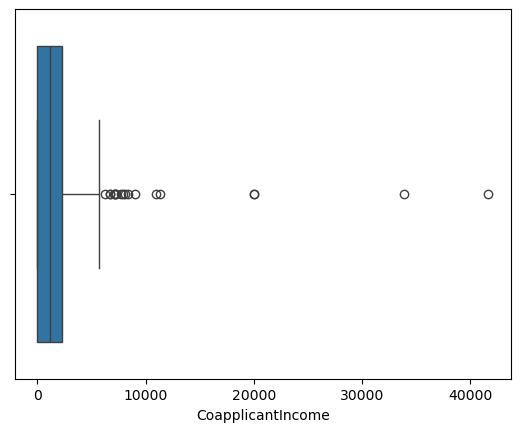

In [14]:
sns.boxplot(x = "CoapplicantIncome",data = df)
plt.show()

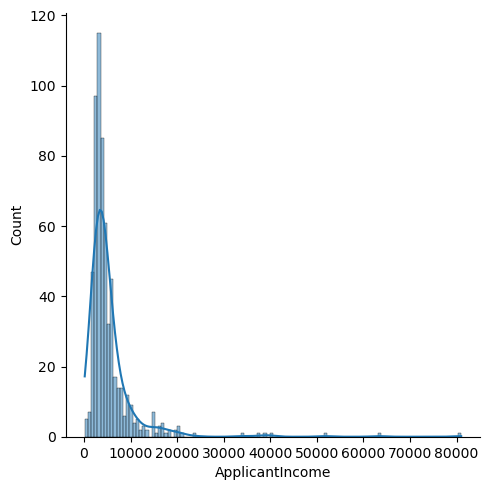

In [26]:
sns.displot(x = "ApplicantIncome",data = df,kde = True)

## Removing the outlier using the IQR method 

In [38]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)
IQR = q3-q1

In [40]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR)
print(min_range)
print(max_range)

-3445.875
5743.125


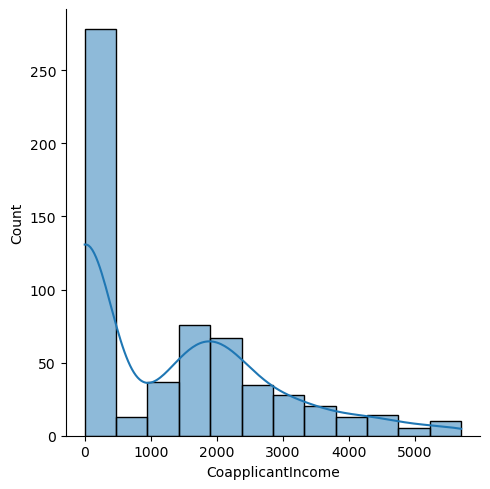

In [54]:
new_df = df[df["CoapplicantIncome"]<max_range]
sns.displot(x = "CoapplicantIncome",data = new_df,kde = True)

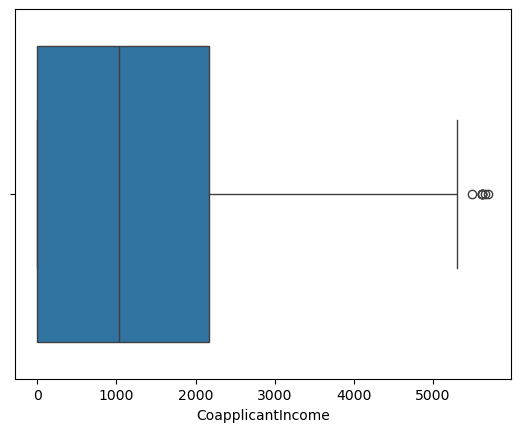

In [55]:
sns.boxplot(x = "CoapplicantIncome",data = new_df)
plt.show()

## outlier removal using the min and max standard deviation

In [91]:
df = pd.read_csv(r"loan.csv")
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
df.describe()
# coapplicantIncome column is have the huge difference between the mean and the max 
# there is huge possiblities of having the outliers we use z score to remove the outliers from the data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='CoapplicantIncome'>

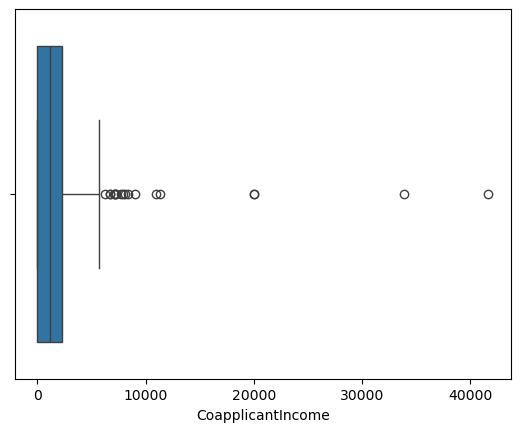

In [93]:
sns.boxplot(x = "CoapplicantIncome",data = df)

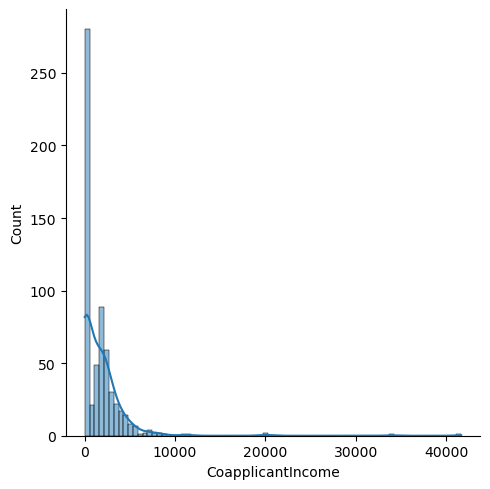

In [94]:
sns.displot(x = "CoapplicantIncome",data = df,kde = True)

In [95]:
min_range = df["CoapplicantIncome"].mean()-(3*df["CoapplicantIncome"].std())
max_range = df["CoapplicantIncome"].mean()+(3*df["CoapplicantIncome"].std())

In [96]:
print(min_range)
print(max_range)

-7157.499309645475
10399.990905699677


In [97]:
new_df = df[df["CoapplicantIncome"] < max_range]

<Axes: xlabel='CoapplicantIncome'>

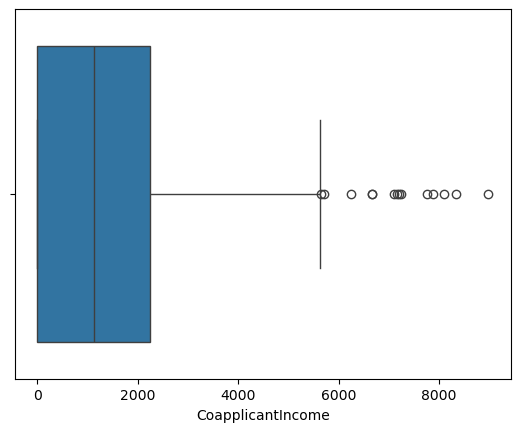

In [78]:
sns.boxplot(x = "CoapplicantIncome",data = new_df)

## using the z score

In [83]:
# using z score we should have to calculate the z score first 
z_score = (df["CoapplicantIncome"] - df["CoapplicantIncome"].mean()) / df["CoapplicantIncome"].std()
df["z_score"] = z_score

In [89]:
# the data which is less than 3 is the data what we are looking for the data which does have outliers
zscoredf = df[df["z_score"]<3]

<Axes: xlabel='CoapplicantIncome'>

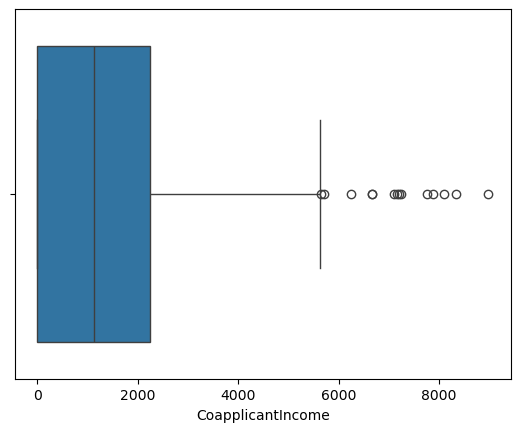

In [90]:
sns.boxplot(x = "CoapplicantIncome",data = zscoredf)